<a href="https://colab.research.google.com/github/kartik2627/Artificial-neural-network/blob/main/chunn_model_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
tf.__version__

'2.15.0'

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

In [13]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
print(y)

[1 0 1 ... 1 1 0]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your data into a DataFrame called 'data'
# If not, you can load it using pandas.read_csv() or another appropriate method


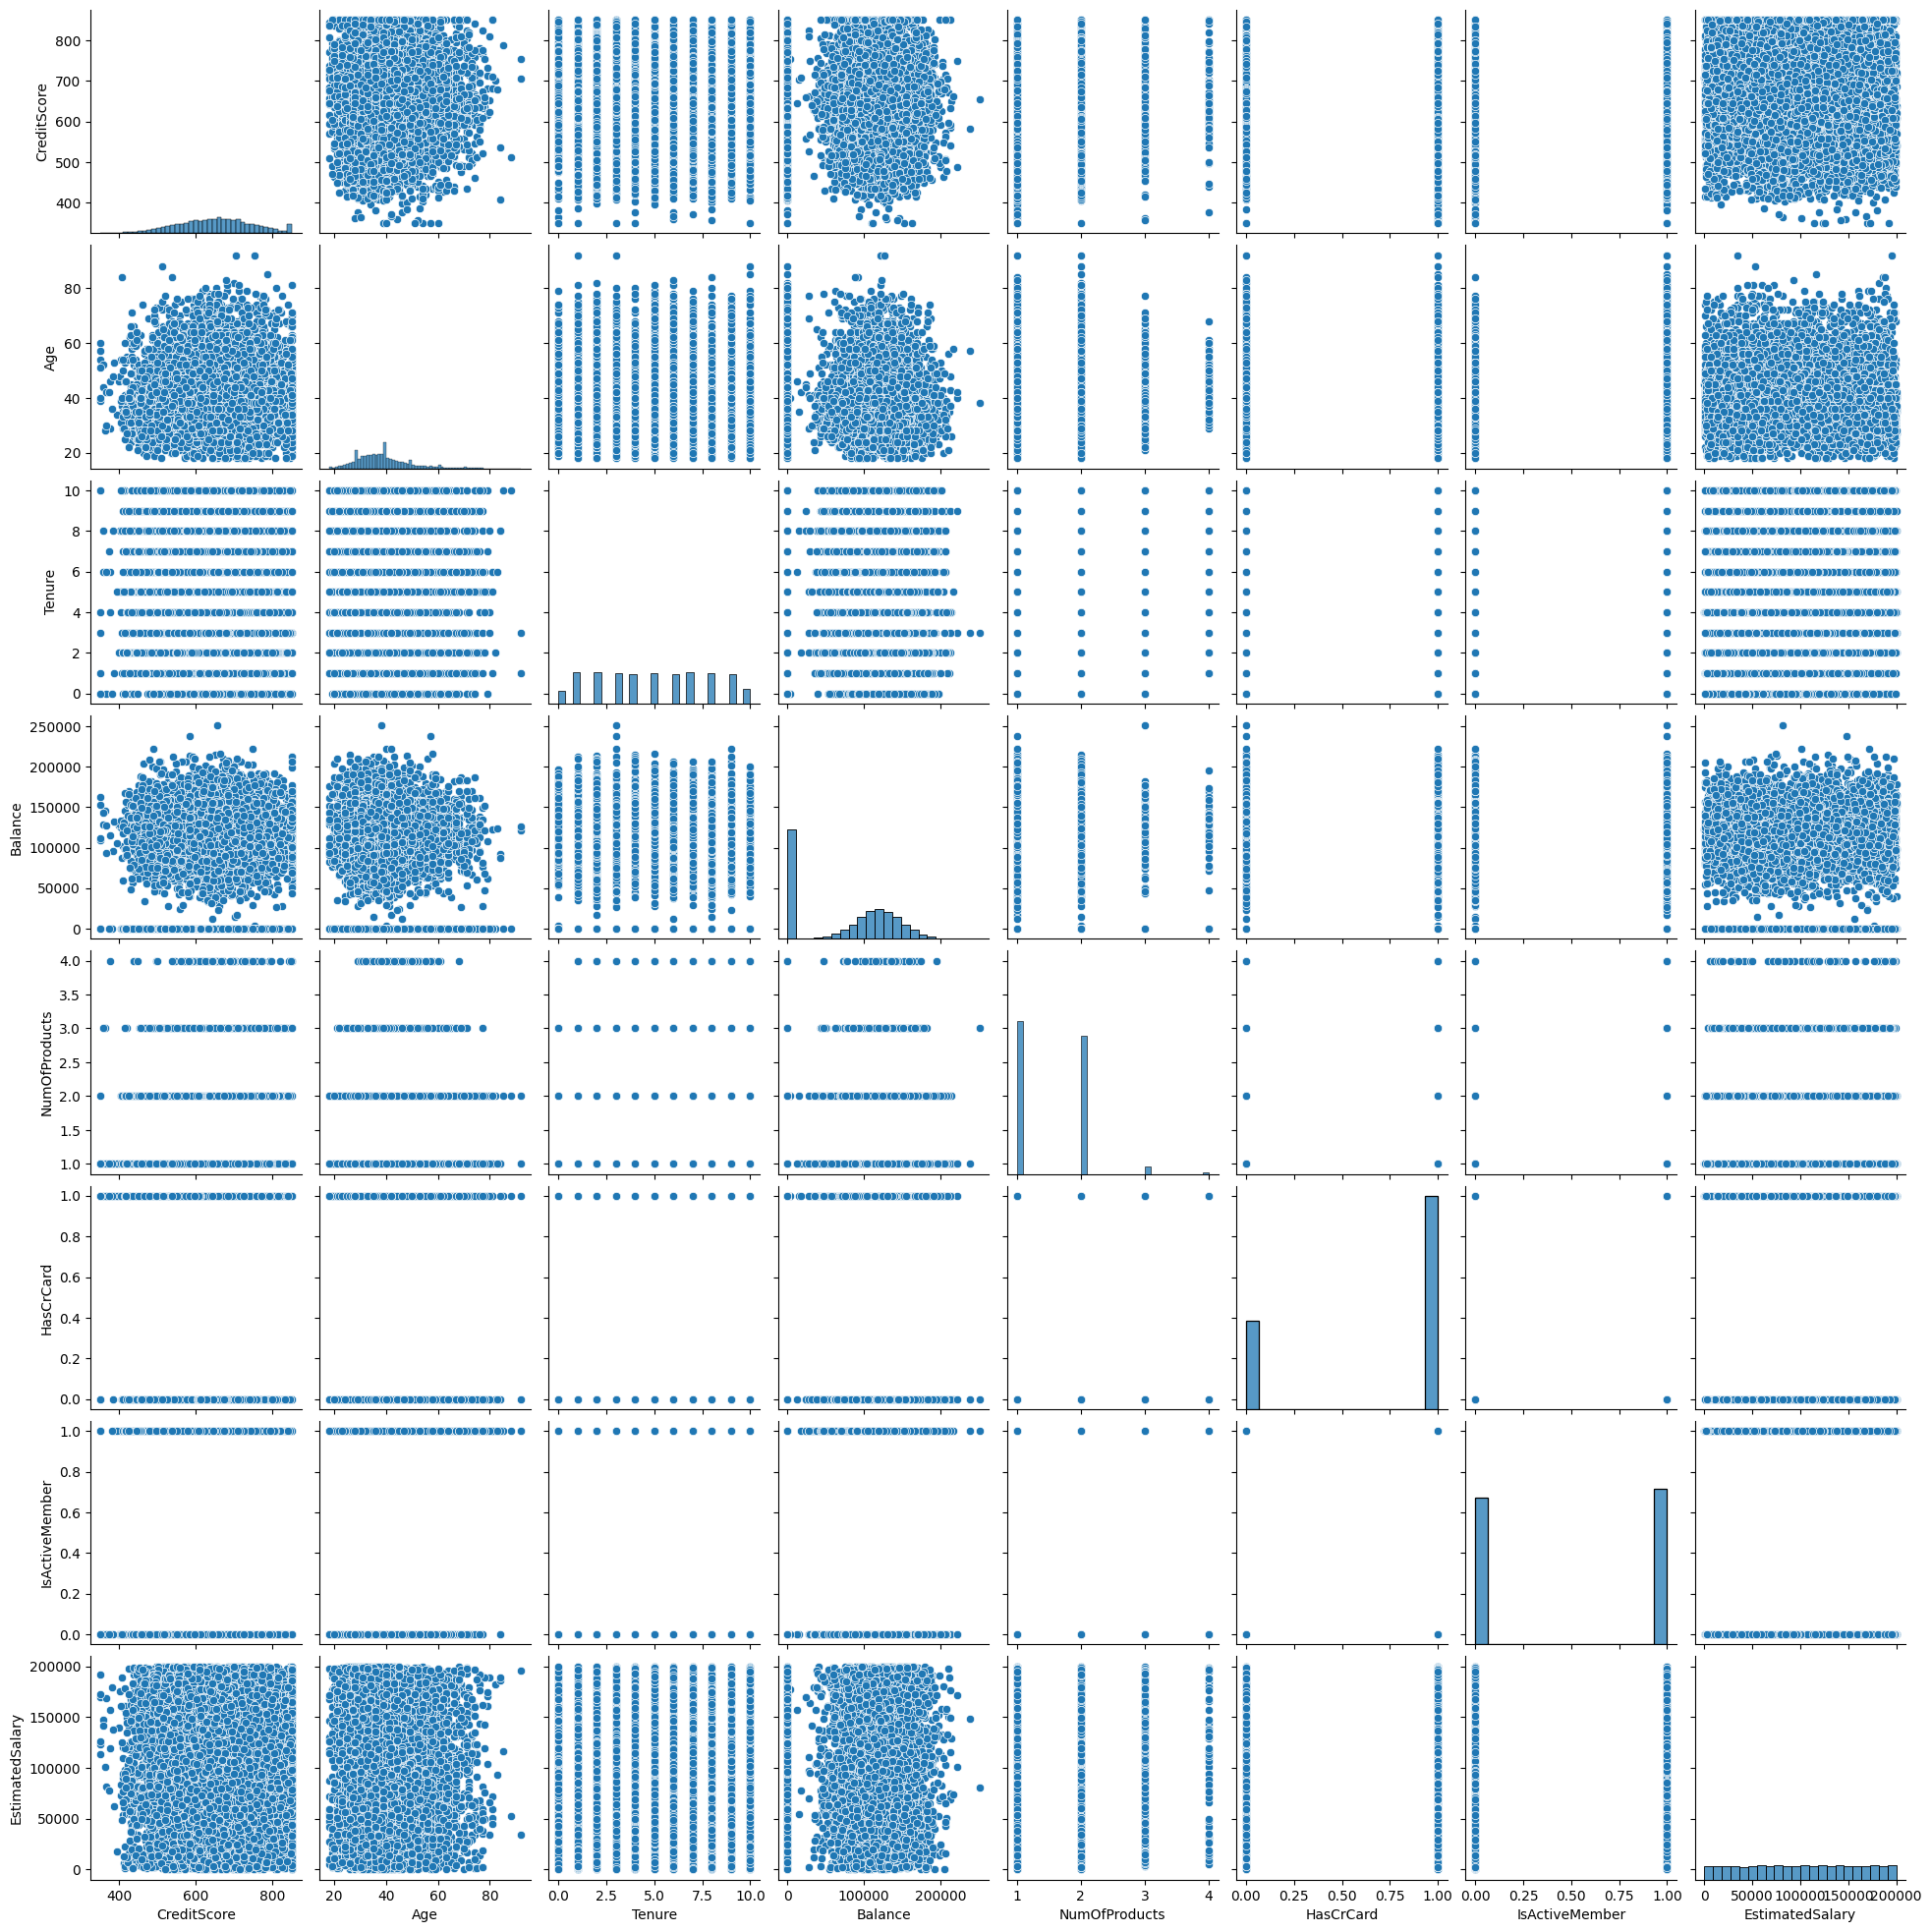

In [16]:
# Pairplot to visualize relationships between features
sns.pairplot(data=data.iloc[:, 3:-1])
plt.show()

<ipython-input-17-9c2530bcf32a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.iloc[:, 3:-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")


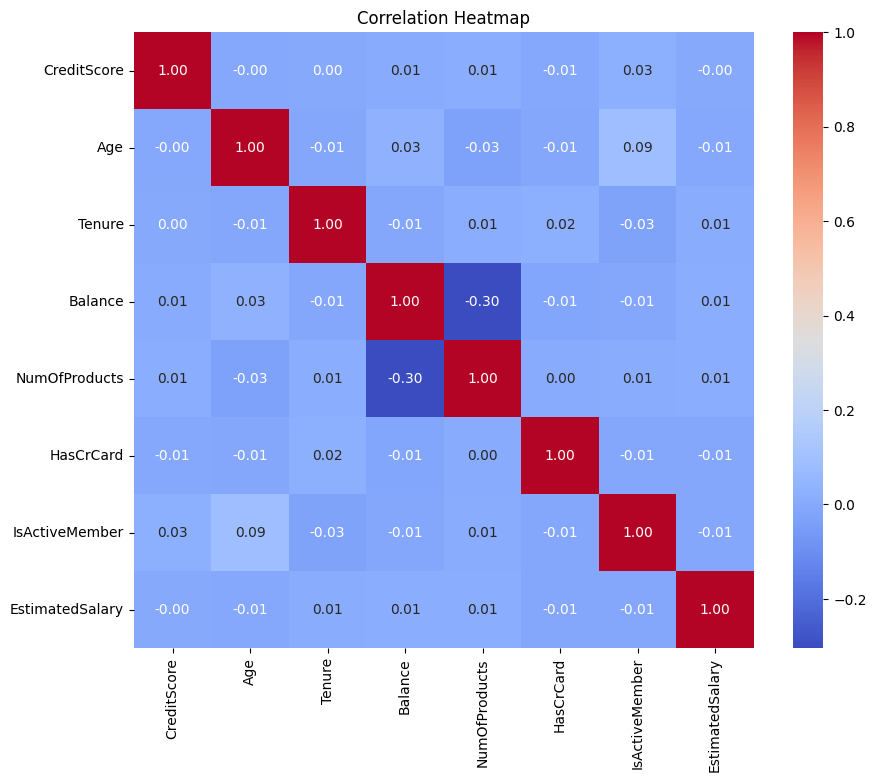

In [17]:
# Correlation heatmap to visualize feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, 3:-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


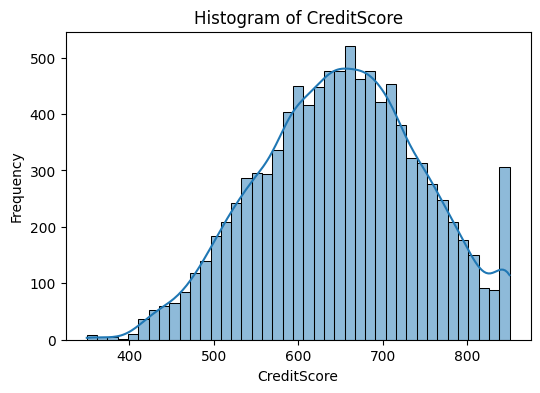

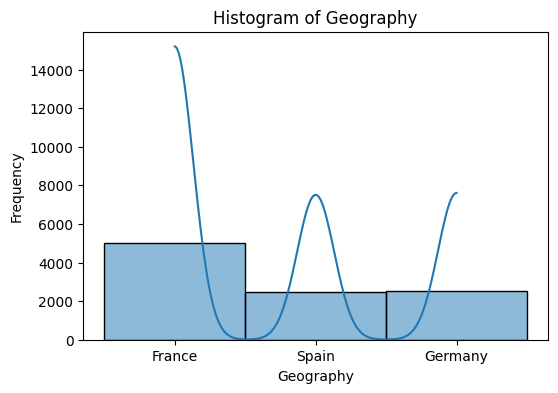

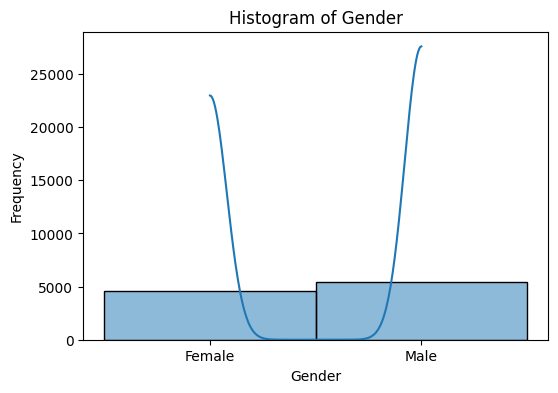

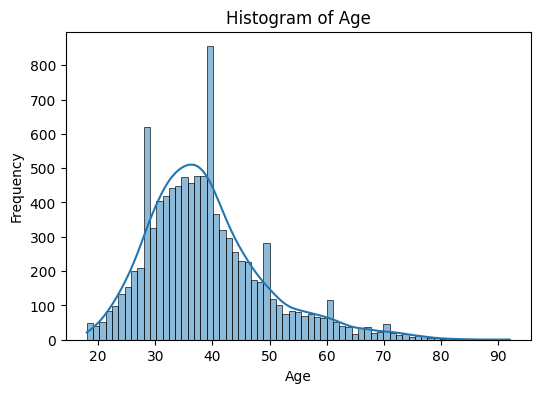

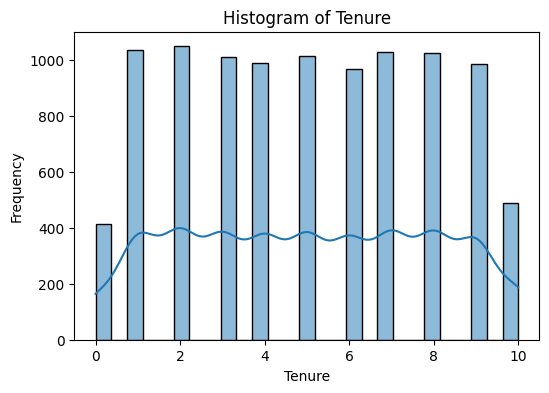

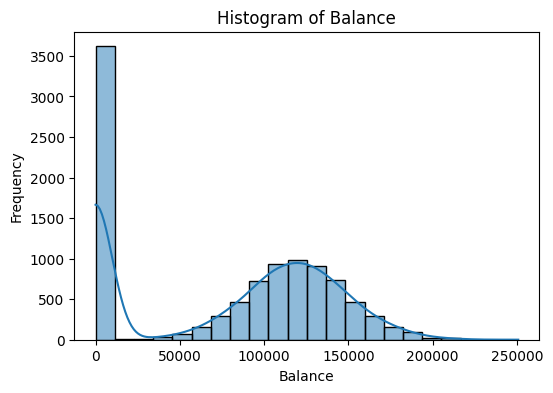

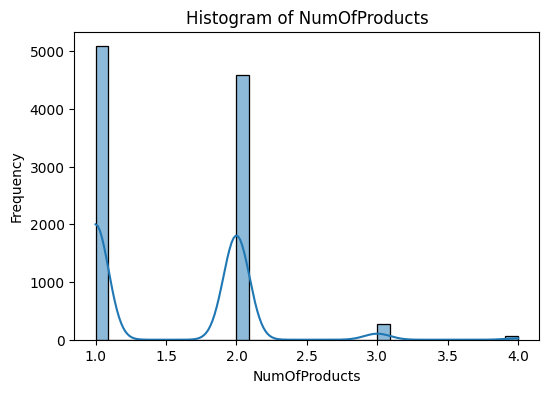

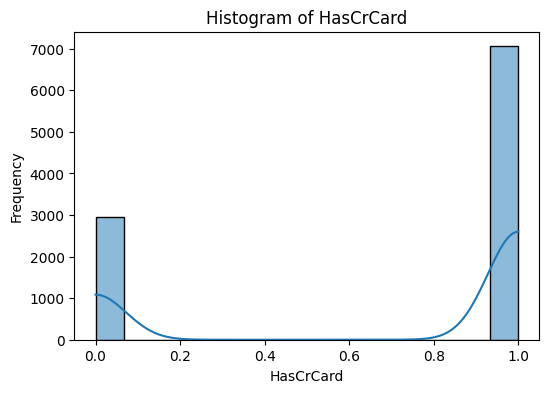

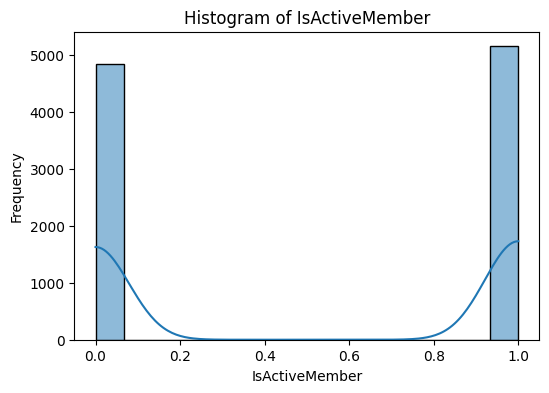

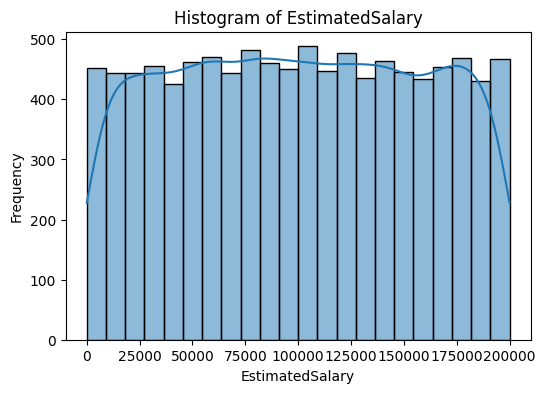

In [18]:
# Histograms for individual features
for column in data.columns[3:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

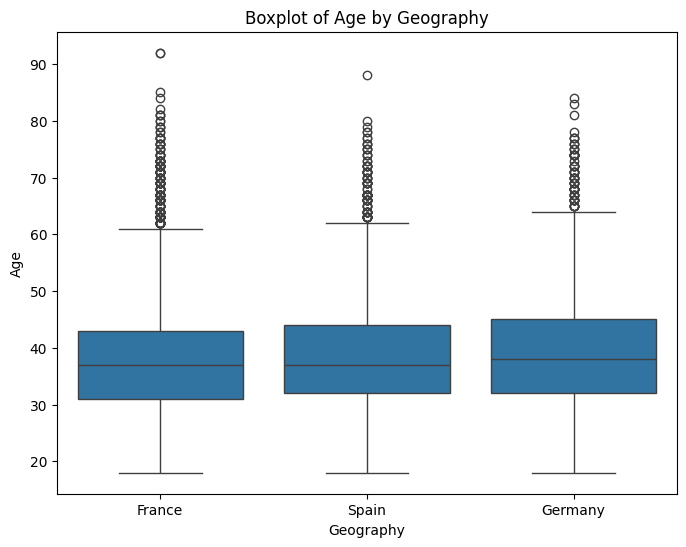

In [19]:
# Boxplot for Age and Geography
plt.figure(figsize=(8, 6))
sns.boxplot(x='Geography', y='Age', data=data)
plt.title('Boxplot of Age by Geography')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()

# Encoding categorical data

Label Encoding the "Gender" column

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
X[:,2] = le.fit_transform(X[:,2])

In [22]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [24]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN

In [28]:
ann = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [29]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.5793 - accuracy: 0.7595
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.7961
Epoch 3/200
250/250 [==============================] - 1s 6ms/step - loss: 0.4453 - accuracy: 0.7984
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4358 - accuracy: 0.8011
Epoch 5/200
250/250 [==============================] - 2s 7ms/step - loss: 0.4296 - accuracy: 0.8029
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8036
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8064
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8085
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8251
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3830 - accura

# Predicting the Test set results

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 1s 6ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 195  210]]


0.8635